In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/train_set.csv')

In [ ]:
data

,Date,Day,CodedDay,Zone,Weather,Temperature,Traffic
0,1-01-2017,Sunday,7,1,21,17,1
1,1-01-2017,Sunday,7,2,12,34,2
2,1-01-2017,Sunday,7,3,25,24,2
3,1-01-2017,Sunday,7,4,46,41,4
4,1-01-2017,Sunday,7,5,33,19,3
...,...,...,...,...,...,...,...
52411,31-12-2017,Saturday,6,140,15,35,2
52412,31-12-2017,Saturday,6,141,27,11,4
52413,31-12-2017,Saturday,6,142,25,12,3
52414,31-12-2017,Saturday,6,143,24,28,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         52416 non-null  object
 1   Day          52416 non-null  object
 2   CodedDay     52416 non-null  int64 
 3   Zone         52416 non-null  int64 
 4   Weather      52416 non-null  int64 
 5   Temperature  52416 non-null  int64 
 6   Traffic      52416 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.8+ MB


In [ ]:
#preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data['Date']=le.fit_transform(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         52416 non-null  int64 
 1   Day          52416 non-null  object
 2   CodedDay     52416 non-null  int64 
 3   Zone         52416 non-null  int64 
 4   Weather      52416 non-null  int64 
 5   Temperature  52416 non-null  int64 
 6   Traffic      52416 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 2.8+ MB


In [ ]:
x=data.iloc[:,2:6].values
y=data.iloc[:,6:7].values

In [ ]:
x

array([[  7,   1,  21,  17],
       [  7,   2,  12,  34],
       [  7,   3,  25,  24],
       ...,
       [  6, 142,  25,  12],
       [  6, 143,  24,  28],
       [  6, 144,  14,  24]])

In [ ]:
x.shape

(52416, 4)

In [ ]:
y


array([[1],
       [2],
       [2],
       ...,
       [3],
       [1],
       [1]])

In [ ]:
y.shape

(52416, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((41932, 4), (41932, 1), (10484, 4), (10484, 1))

In [ ]:
#feature scaling normalising
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
x_train

array([[ 1.50038620e+00, -1.19374599e+00, -2.50917039e-01,
         8.15385293e-01],
       [ 1.50038620e+00,  1.06932573e-01,  1.34192615e+00,
         1.59319386e+00],
       [ 5.00454635e-01, -1.36235247e+00, -3.23319002e-01,
        -1.17234771e+00],
       ...,
       [-1.49940849e+00,  1.47987105e+00, -9.74936669e-01,
         1.16107799e+00],
       [-1.49940849e+00,  1.79192493e-01, -1.78515076e-01,
         1.23999901e-01],
       [ 4.88853311e-04,  1.64847753e+00,  1.26952418e+00,
        -1.34519406e+00]])

In [ ]:
#random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300,random_state=0)

In [ ]:
regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(n_estimators=300, random_state=0)

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
if (y_pred.all()<2.5) :
  y_pred = np.round(y_pred-0.5)
else :
  y_pred = np.round(y_pred+0.5)
y_pred

array([2., 2., 2., ..., 2., 2., 3.])

In [ ]:
df=(y_pred-y_test)/y_test
df=round(df.mean()*100,2)
print("error=",df,"%")

error= 13.41 %


In [ ]:
a=100-df
print("accuracy=",a,"%")

accuracy= 86.59 %


[[  38 1003  982   32    0]
 [  50 1025 1000   43    0]
 [  48 1083  972   43    0]
 [  43  982 1024   49    0]
 [  39  985  999   44    0]]


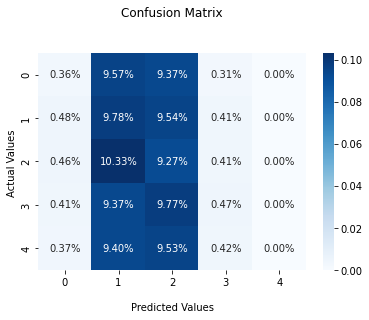

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
import seaborn as sns

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [ ]:
#Support vector machine
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3.06398995, 2.97919108, 2.98471316, ..., 2.93682106, 2.95802622,
       3.04488135])

In [ ]:
if (y_pred.all()<2.5) :
  y_pred = np.round(y_pred-0.5)
else :
  y_pred = np.round(y_pred+0.5)
y_pred.shape

(10484,)

In [ ]:
df=(y_pred-y_test)/y_test
df=round(df.mean()*100,2)
print("error=",df,"%")

error= 10.58 %


In [ ]:
a=100-df
print("accuracy=",a,"%")

accuracy= 89.42 %


[[   0 1181  874    0    0]
 [   0 1218  900    0    0]
 [   0 1228  918    0    0]
 [   0 1197  901    0    0]
 [   0 1133  934    0    0]]


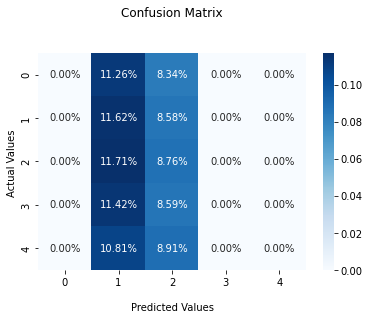

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
import seaborn as sns

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
column_names = ["Date","Day","CodedDay","Zone","Weather","Temperature","Traffic"]
sundf = pd.DataFrame(columns=column_names)
mondf = pd.DataFrame(columns=column_names)
tuedf = pd.DataFrame(columns=column_names)
weddf = pd.DataFrame(columns=column_names)
thudf = pd.DataFrame(columns=column_names)
fridf = pd.DataFrame(columns=column_names)
satdf = pd.DataFrame(columns=column_names)
sunday=[]
monday=[]
tuesday=[]
wednesday=[]
thursday=[]
friday=[]
saturday=[]
for i in data.index :
  Date = data['Date'][i]
  Day = data['Day'][i]
  CodedDay = data['CodedDay'][i]
  Zone = data['Zone'][i]
  Weather = data['Weather'][i]
  Temperature = data['Temperature'][i]
  Traffic = data['Traffic'][i]
  dict_ = {"Date" : Date, "Day" : Day, "CodedDay" : CodedDay, "Zone" : Zone, "Weather" : Weather, "Temperature" : Temperature, "Traffic" : Traffic}
  if data['Day'][i] == 'Sunday' :
    sundf=sundf.append(dict_,ignore_index = True)
    sunday.append(Traffic)
  if data['Day'][i] == 'Monday' :
    mondf=mondf.append(dict_,ignore_index = True)
    monday.append(Traffic)
  if data['Day'][i] == 'Tuesday' :
    tuedf=tuedf.append(dict_,ignore_index = True)
    tuesday.append(Traffic)
  if data['Day'][i] == 'Wednesday' :
    weddf=weddf.append(dict_,ignore_index = True)
    wednesday.append(Traffic)
  if data['Day'][i] == 'Thursday' :
    thudf=thudf.append(dict_,ignore_index = True)
    thursday.append(Traffic)
  if data['Day'][i] == 'Friday' :
    fridf=fridf.append(dict_,ignore_index = True)
    friday.append(Traffic)
  if data['Day'][i] == 'Saturday' :
    satdf=satdf.append(dict_,ignore_index = True)
    saturday.append(Traffic)






In [ ]:
sundf,mondf,tuedf,weddf,thudf,fridf,satdf

(     Date     Day CodedDay Zone Weather Temperature Traffic
 0       0  Sunday        7    1      21          17       1
 1       0  Sunday        7    2      12          34       2
 2       0  Sunday        7    3      25          24       2
 3       0  Sunday        7    4      46          41       4
 4       0  Sunday        7    5      33          19       3
 ...   ...     ...      ...  ...     ...         ...     ...
 7483  215  Sunday        7  140      42           9       3
 7484  215  Sunday        7  141      26          25       3
 7485  215  Sunday        7  142      24          22       5
 7486  215  Sunday        7  143       8          23       3
 7487  215  Sunday        7  144      18          10       1
 
 [7488 rows x 7 columns],
      Date     Day CodedDay Zone Weather Temperature Traffic
 0     132  Monday        1    1       6          39       2
 1     132  Monday        1    2      13          39       5
 2     132  Monday        1    3      17          12     

In [ ]:
s1=s2=s3=s4=s5=0
for i in sundf.index :
  x = sundf['Traffic'][i]
  if x==1 :
    s1 = s1+1
  elif x==2:
    s2 = s2+1
  elif x==3 :
    s3 = s3+1
  elif x==4:
    s4 = s4+1
  elif x==5:
    s5 = s5+1
print(s1,s2,s3,s4,s5)

1484 1585 1506 1429 1484


In [ ]:
m1=m2=m3=m4=m5=0
for i in mondf.index :
  x = mondf['Traffic'][i]
  if x==1 :
    m1 = m1+1
  elif x==2:
    m2 = m2+1
  elif x==3 :
    m3 = m3+1
  elif x==4:
    m4 = m4+1
  elif x==5:
    m5 = m5+1
print(m1,m2,m3,m4,m5)

1418 1580 1488 1534 1468


In [ ]:
t1=t2=t3=t4=t5=0
for i in tuedf.index :
  x = tuedf['Traffic'][i]
  if x==1 :
    t1 = t1+1
  elif x==2:
    t2 = t2+1
  elif x==3 :
    t3 = t3+1
  elif x==4:
    t4 = t4+1
  elif x==5:
    t5 = t5+1
print(t1,t2,t3,t4,t5)

1527 1497 1423 1469 1572


In [ ]:
w1=w2=w3=w4=w5=0
for i in weddf.index :
  x = weddf['Traffic'][i]
  if x==1 :
    w1 = w1+1
  elif x==2:
    w2 = w2+1
  elif x==3 :
    w3 = w3+1
  elif x==4:
    w4 = w4+1
  elif x==5:
    w5 = w5+1
print(w1,w2,w3,w4,w5)

1500 1546 1494 1488 1460


In [ ]:
th1=th2=th3=th4=th5=0
for i in thudf.index :
  x = thudf['Traffic'][i]
  if x==1 :
    th1 = th1+1
  elif x==2:
    th2 = th2+1
  elif x==3 :
    th3 = th3+1
  elif x==4:
    th4 = th4+1
  elif x==5:
    th5 = th5+1
print(th1,th2,th3,th4,th5)

1414 1526 1517 1486 1545


In [ ]:
f1=f2=f3=f4=f5=0
for i in fridf.index :
  x = fridf['Traffic'][i]
  if x==1 :
    f1 = f1+1
  elif x==2:
    f2 = f2+1
  elif x==3 :
    f3 = f3+1
  elif x==4:
    f4 = f4+1
  elif x==5:
    f5 = f5+1
print(f1,f2,f3,f4,f5)

1482 1501 1468 1536 1501


In [ ]:
sa1=sa2=sa3=sa4=sa5=0
for i in satdf.index :
  x = satdf['Traffic'][i]
  if x==1 :
    sa1 = sa1+1
  elif x==2:
    sa2 = sa2+1
  elif x==3 :
    sa3 = sa3+1
  elif x==4:
    sa4 = sa4+1
  elif x==5:
    sa5 = sa5+1
print(sa1,sa2,sa3,sa4,sa5)

1548 1579 1471 1458 1432


In [ ]:
max(s1,m1,t1,w1,th1,f1,sa1)
#saturday


1548

In [ ]:
max(s2,m2,t2,w2,th2,f2,sa2)
#sunday

1585

In [ ]:
max(s3,m3,t3,w3,th3,f3,sa3)
#thursday

1517

In [ ]:
max(s4,m4,t4,w4,th4,f4,sa4)
#friday

1536

In [ ]:
max(s5,m5,t5,w5,th5,f5,sa5)
#tuesday

1572

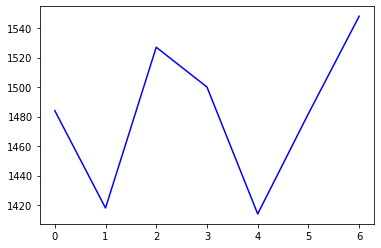

In [ ]:
import matplotlib.pyplot as plt
l1=[s1,m1,t1,w1,th1,f1,sa1]
l2=[s2,m2,t2,w2,th2,f2,sa2]
l3=[s3,m3,t3,w3,th3,f3,sa3]
l4=[s4,m4,t4,w4,th4,f4,sa4]
l5=[s5,m5,t5,w5,th5,f5,sa5]
x = plt.plot(l1,'blue')
plt.show()
codedday=[1,2,3,4,5,6,7]

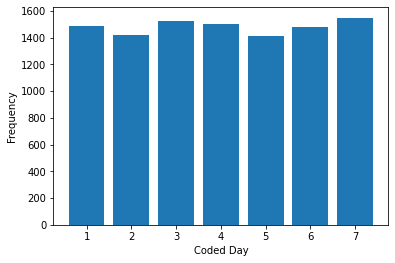

In [ ]:
#graph for traffic level - 1
plt.bar(codedday,l1)
plt.xlabel('Coded Day')
plt.ylabel('Frequency')
plt.show()

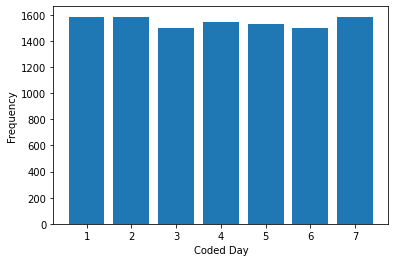

In [ ]:
plt.bar(codedday,l2)
plt.xlabel('Coded Day')
plt.ylabel('Frequency')
plt.show()

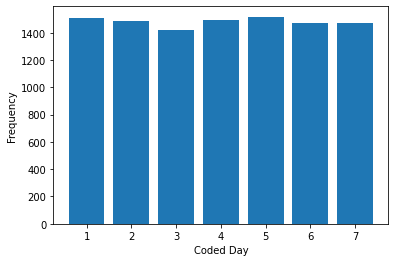

In [ ]:
plt.bar(codedday,l3)
plt.xlabel('Coded Day')
plt.ylabel('Frequency')
plt.show()

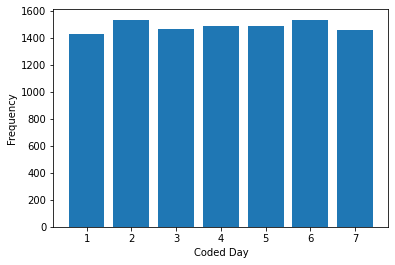

In [ ]:
plt.bar(codedday,l4)
plt.xlabel('Coded Day')
plt.ylabel('Frequency')
plt.show()

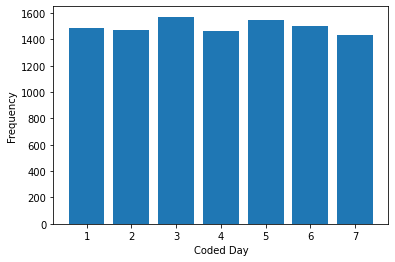

In [ ]:
plt.bar(codedday,l5)
plt.xlabel('Coded Day')
plt.ylabel('Frequency')
plt.show()

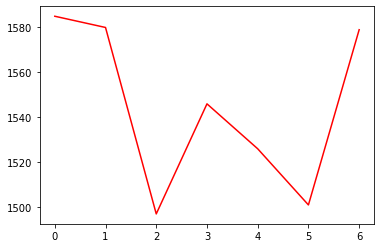

In [ ]:
y = plt.plot(l2,'red')
plt.show()

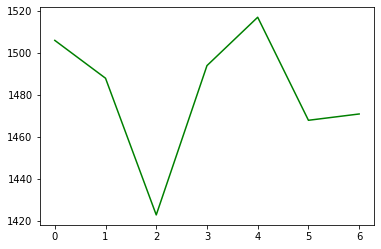

In [ ]:
z = plt.plot(l3,'green')
plt.show()

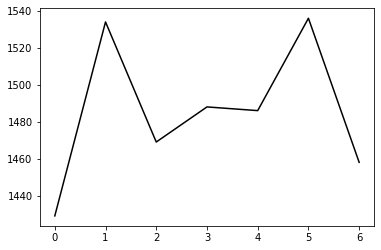

In [ ]:
a = plt.plot(l4,'black')
plt.show()

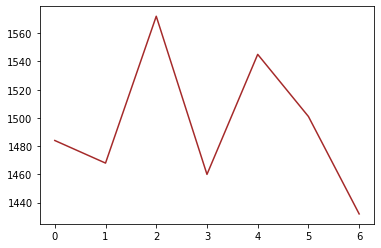

In [ ]:
b = plt.plot(l5,'brown')
plt.show()

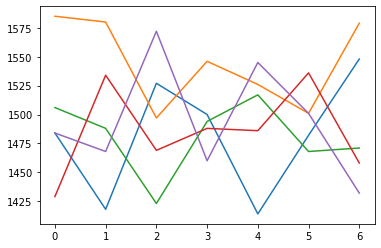

In [ ]:
plt.plot(l1)
plt.plot(l2)
plt.plot(l3)
plt.plot(l4)
plt.plot(l5)
plt.show()

In [ ]:
# observations :-
# 1 - max on saturday
# 2 - max on sunday
# 3 - max on thursday
# 4 - max on friday
# 5 - max on tuesday

In [ ]:
sunday=0
monday=0
tuesday=0
wednesday=0
thursday=0
friday=0
saturday=0
zone_dict = {}

In [ ]:
zone__dict= {}
for i in data.index :
  zone = data['Zone'][i]
  current = 1.1
  min_day = 'Sunday'
  for j in sundf.index :
    if sundf['Zone'][j] == zone :
      if current > sundf['Traffic'][j] :
        current = sundf['Traffic'][j]
        min_day = 'Sunday'
        break
      else :
        break
    else :
      continue
  for j in mondf.index :
    if mondf['Zone'][j] == zone :
      if current > mondf['Traffic'][j] :
        current = mondf['Traffic'][j]
        min_day = 'Monday'
        break
      else :
        break
    else :
      continue
  for j in tuedf.index :
    if tuedf['Zone'][j] == zone :
      if current > tuedf['Traffic'][j] :
        current = tuedf['Traffic'][j]
        min_day = 'Tuesday'
        break
      else :
        break
    else :
      continue
  for j in weddf.index :
    if weddf['Zone'][j] == zone :
      if current > weddf['Traffic'][j] :
        current = weddf['Traffic'][j]
        min_day = 'Wednesday'
        break
      else :
        break
    else :
      continue
  for j in thudf.index :
    if thudf['Zone'][j] == zone :
      if current > thudf['Traffic'][j] :
        current = thudf['Traffic'][j]
        min_day = 'Thursday'
        break
      else :
        break
    else :
      continue
  for j in fridf.index :
    if fridf['Zone'][j] == zone :
      if current > fridf['Traffic'][j] :
        current = fridf['Traffic'][j]
        min_day = 'Friday'
        break
      else :
        break
    else :
      continue
  for j in satdf.index :
    if satdf['Zone'][j] == zone :
      if current > satdf['Traffic'][j] :
        current = satdf['Traffic'][j]
        min_day = 'Saturday'
        break
      else :
        break
    else :
      continue
  if zone not in zone__dict :
    zone__dict[zone] = min_day
print(zone__dict)





{1: 'Sunday', 2: 'Sunday', 3: 'Tuesday', 4: 'Sunday', 5: 'Sunday', 6: 'Thursday', 7: 'Sunday', 8: 'Sunday', 9: 'Monday', 10: 'Tuesday', 11: 'Sunday', 12: 'Sunday', 13: 'Sunday', 14: 'Monday', 15: 'Monday', 16: 'Sunday', 17: 'Wednesday', 18: 'Sunday', 19: 'Sunday', 20: 'Sunday', 21: 'Monday', 22: 'Sunday', 23: 'Tuesday', 24: 'Sunday', 25: 'Sunday', 26: 'Sunday', 27: 'Monday', 28: 'Sunday', 29: 'Sunday', 30: 'Saturday', 31: 'Thursday', 32: 'Monday', 33: 'Monday', 34: 'Sunday', 35: 'Sunday', 36: 'Sunday', 37: 'Sunday', 38: 'Wednesday', 39: 'Wednesday', 40: 'Sunday', 41: 'Friday', 42: 'Sunday', 43: 'Sunday', 44: 'Wednesday', 45: 'Monday', 46: 'Sunday', 47: 'Tuesday', 48: 'Tuesday', 49: 'Sunday', 50: 'Sunday', 51: 'Wednesday', 52: 'Sunday', 53: 'Monday', 54: 'Sunday', 55: 'Monday', 56: 'Saturday', 57: 'Sunday', 58: 'Tuesday', 59: 'Sunday', 60: 'Friday', 61: 'Friday', 62: 'Sunday', 63: 'Sunday', 64: 'Friday', 65: 'Sunday', 66: 'Monday', 67: 'Sunday', 68: 'Friday', 69: 'Friday', 70: 'Sunday',

In [ ]:
from sklearn.preprocessing import StandardScaler
cd = input("enter coded day")
z = input("enter zone")
w = input("enter weather code")
temp = input("enter temperature")
x_input = np.array([[cd,z,w,temp]])
x_minmax = sc.fit_transform(x_input)
y__pred = regressor.predict(x_minmax)
# print(y__pred)
if (y__pred.all()<2.5) :
  y__pred = np.round(y__pred-0.5)
else :
  y__pred = np.round(y__pred+0.5)
y__pred = int(y__pred)
print('Predicted traffic rate is '+str(y__pred))

enter coded day3
enter zone5
enter weather code20
enter temperature22
Predicted traffic rate is 3


In [ ]:
# tinker code
# zone_dict = {1: 'Sunday', 2: 'Sunday', 3: 'Tuesday', 4: 'Sunday', 5: 'Sunday', 6: 'Thursday', 7: 'Sunday', 8: 'Sunday', 9: 'Monday', 10: 'Tuesday', 11: 'Sunday', 12: 'Sunday', 13: 'Sunday', 14: 'Monday', 15: 'Monday', 16: 'Sunday', 17: 'Wednesday', 18: 'Sunday', 19: 'Sunday', 20: 'Sunday', 21: 'Monday', 22: 'Sunday', 23: 'Tuesday', 24: 'Sunday', 25: 'Sunday', 26: 'Sunday', 27: 'Monday', 28: 'Sunday', 29: 'Sunday', 30: 'Saturday', 31: 'Thursday', 32: 'Monday', 33: 'Monday', 34: 'Sunday', 35: 'Sunday', 36: 'Sunday', 37: 'Sunday', 38: 'Wednesday', 39: 'Wednesday', 40: 'Sunday', 41: 'Friday', 42: 'Sunday', 43: 'Sunday', 44: 'Wednesday', 45: 'Monday', 46: 'Sunday', 47: 'Tuesday', 48: 'Tuesday', 49: 'Sunday', 50: 'Sunday', 51: 'Wednesday', 52: 'Sunday', 53: 'Monday', 54: 'Sunday', 55: 'Monday', 56: 'Saturday', 57: 'Sunday', 58: 'Tuesday', 59: 'Sunday', 60: 'Friday', 61: 'Friday', 62: 'Sunday', 63: 'Sunday', 64: 'Friday', 65: 'Sunday', 66: 'Monday', 67: 'Sunday', 68: 'Friday', 69: 'Friday', 70: 'Sunday', 71: 'Monday', 72: 'Sunday', 73: 'Sunday', 74: 'Tuesday', 75: 'Sunday', 76: 'Wednesday', 77: 'Monday', 78: 'Sunday', 79: 'Tuesday', 80: 'Tuesday', 81: 'Sunday', 82: 'Monday', 83: 'Sunday', 84: 'Wednesday', 85: 'Wednesday', 86: 'Sunday', 87: 'Monday', 88: 'Wednesday', 89: 'Wednesday', 90: 'Tuesday', 91: 'Tuesday', 92: 'Sunday', 93: 'Sunday', 94: 'Sunday', 95: 'Sunday', 96: 'Monday', 97: 'Sunday', 98: 'Sunday', 99: 'Sunday', 100: 'Tuesday', 101: 'Sunday', 102: 'Monday', 103: 'Tuesday', 104: 'Thursday', 105: 'Sunday', 106: 'Monday', 107: 'Tuesday', 108: 'Wednesday', 109: 'Tuesday', 110: 'Tuesday', 111: 'Sunday', 112: 'Tuesday', 113: 'Monday', 114: 'Sunday', 115: 'Sunday', 116: 'Wednesday', 117: 'Saturday', 118: 'Sunday', 119: 'Sunday', 120: 'Friday', 121: 'Monday', 122: 'Sunday', 123: 'Tuesday', 124: 'Sunday', 125: 'Friday', 126: 'Sunday', 127: 'Wednesday', 128: 'Sunday', 129: 'Sunday', 130: 'Friday', 131: 'Sunday', 132: 'Tuesday', 133: 'Tuesday', 134: 'Saturday', 135: 'Wednesday', 136: 'Monday', 137: 'Tuesday', 138: 'Sunday', 139: 'Thursday', 140: 'Sunday', 141: 'Sunday', 142: 'Wednesday', 143: 'Friday', 144: 'Sunday'}
# from tkinter import *
# root = Tk()

# e= Entry(root, width=50)
# e.pack()
# e.insert(0, "Enter the zone you want to go to :")
# def myClick() :
#     tk_zone = e.get()
#     tk_zone=tk_zone.strip("Enter the zone you want to go to :")
#     tk_zone = int(tk_zone)
#     tk_day = zone_dict[tk_zone]
#     day = "Easiest day to go to zone "+str(tk_zone)+" is : " + tk_day
#     myLabel = Label(root, text = day)
#     myLabel.pack()
# myButton = Button(root, text = "Get Day", command = myClick)
# myButton.pack()
# root.mainloop()
